In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_excel(r'C:\Users\11ana\Desktop\Projects\Input Well.xlsx', sheet_name = 'Data')

In [3]:
data= data.dropna(axis =1)

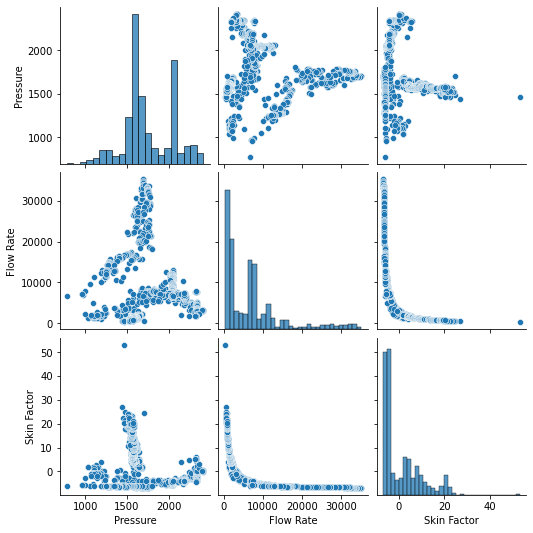

In [4]:
sns.pairplot(data)

In [5]:
X = data[['Pressure','Flow Rate']].values

In [6]:
y = data['Skin Factor'].values

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [9]:
x = X_test
X2= X_train
Y1= y_test
Y2=y_train

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()

In [12]:
X_train = scaler.fit_transform(X_train)

In [13]:
X_test = scaler.transform(X_test)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [15]:
from xgboost import XGBRegressor

C:\Users\11ana\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [19]:
model_rf = XGBRegressor()
model_rf.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [20]:
model_rf.score(X_train,y_train)

0.9999920376800276

In [21]:
model_rf.score(X_test,y_test)

0.9995594203810944

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
Grid_para = {
    "n_estimators" : [90,100,120,150],
    "min_samples_split" : range(2,10,1),
    "min_samples_leaf" : range(2,10,1),
    "max_depth" : range(2,30,1)
    
}

In [24]:
grid = GridSearchCV(estimator = model_rf , param_grid = Grid_para ,n_jobs = -1 , verbose = 3)

In [25]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 7168 candidates, totalling 35840 fits
[16:20:11] WARNING: ..\src\learner.cc:576: 
Parameters: { "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1,
                                    enable_categorical=False, gamma=0,
                                    gpu_id=-1, importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=12,
                                    num_parallel_tree=1, predictor='auto',
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,

In [26]:
grid.best_params_

{'max_depth': 12,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 150}

In [27]:
model_rf = XGBRegressor( n_estimators = 150 , min_samples_split = 2, min_samples_leaf = 2 , max_depth = 12)

In [28]:
model_rf.fit(X_train, y_train)

[16:32:47] WARNING: ..\src\learner.cc:576: 
Parameters: { "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=12, min_child_weight=1,
             min_samples_leaf=2, min_samples_split=2, missing=nan,
             monotone_constraints='()', n_estimators=150, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [29]:
y_boost = model_rf.predict(X_test)

In [30]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_boost))
print('MSE:', metrics.mean_squared_error(y_test, y_boost))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_boost)))
print('R2:', metrics.r2_score(y_test, y_boost))

MAE: 0.07167268507400364
MSE: 0.03572332450641109
RMSE: 0.18900614938782043
R2: 0.999500230869183


In [31]:
X_test.shape

(434, 2)

In [32]:
y_Test = y_test.reshape(434,1)

In [33]:
y_boost.reshape(434,1)

array([[-4.467143  ],
       [ 4.3569183 ],
       [-4.9430723 ],
       [ 5.306451  ],
       [-4.2554193 ],
       [12.425934  ],
       [-4.8444414 ],
       [-5.1530223 ],
       [-4.9704022 ],
       [-4.783325  ],
       [-0.2020198 ],
       [ 9.673872  ],
       [11.922888  ],
       [ 3.3769908 ],
       [-3.7157786 ],
       [-6.5773892 ],
       [ 4.2378635 ],
       [-4.938208  ],
       [-4.986415  ],
       [19.47038   ],
       [-4.777481  ],
       [ 2.355482  ],
       [10.495925  ],
       [-6.719323  ],
       [-2.9763594 ],
       [-6.680285  ],
       [-4.13054   ],
       [-4.1922994 ],
       [-5.2260633 ],
       [ 9.730531  ],
       [21.166142  ],
       [ 8.825404  ],
       [-4.9792237 ],
       [-4.242749  ],
       [-5.8652864 ],
       [14.216687  ],
       [-5.2678704 ],
       [ 0.7290554 ],
       [-4.280657  ],
       [-6.3320384 ],
       [22.81336   ],
       [-4.2490883 ],
       [-4.5175724 ],
       [ 4.0281053 ],
       [-4.0515065 ],
       [-4

In [34]:
y_boost = pd.Series(y_boost.reshape(434,))

In [35]:
pred_df = pd.DataFrame(y_test, columns = ['Skin Factor'])

In [36]:
pred_df = pd.concat([pred_df,y_boost], axis =1)

In [37]:
pred_df.columns = ['Skin Factor', 'Model Predictions']

In [38]:
x = pd.DataFrame(x, columns = ['Pressure', 'Flow Rate'])

In [39]:
pred_dfs = pd.concat([x, pred_df], axis =1)

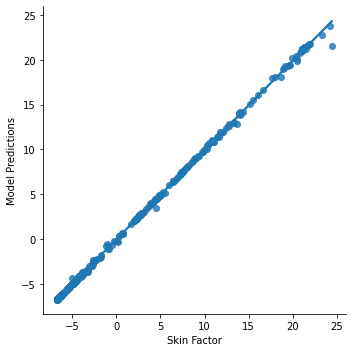

In [40]:
sns.lmplot(x='Skin Factor',y='Model Predictions',data=pred_dfs)

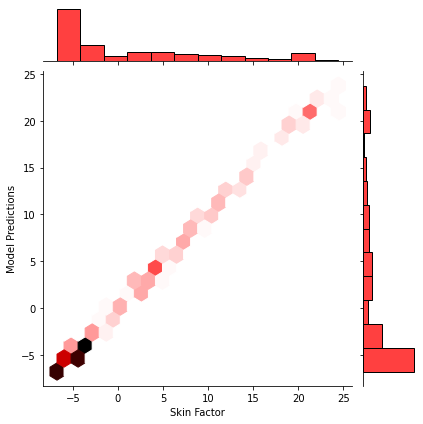

In [41]:
sns.jointplot(x='Skin Factor',y='Model Predictions',kind='hex',color= 'r', gridsize = 20, data=pred_dfs)